In [73]:
imagepath='/Users/wuzhenglung/Documents/t10k-images.idx3-ubyte'
labelpath='/Users/wuzhenglung/Documents/t10k-labels.idx1-ubyte'



In [75]:
'''
TEST SET IMAGE FILE (t10k-images-idx3-ubyte):

[offset] [type]          [value]          [description] 
0000     32 bit integer  0x00000803(2051) magic number 
0004     32 bit integer  10000            number of images 
0008     32 bit integer  28               number of rows 
0012     32 bit integer  28               number of columns 
0016     unsigned byte   ??               pixel 
0017     unsigned byte   ??               pixel 
........ 
xxxx     unsigned byte   ??               pixel
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black). 
  
'''


def GetImages():
    img=open(imagepath,'rb')
    s=img.read()
    print(len(s))
    magn=int.from_bytes(s[0:4],byteorder='big')
    number_img=int.from_bytes(s[5:8],byteorder='big')
    row_nm=int.from_bytes(s[9:12],byteorder='big')
    col_nm=int.from_bytes(s[13:16],byteorder='big')
    print(magn,number_img,row_nm,col_nm)
    s=s[16:]
    print(len(s))
    imgs=[]
    size=row_nm*col_nm
    for i in range(0,len(s),size):
        imgs.append(s[i:i+size])
    return imgs
    
    
    

imgs=GetImages()
#imgs[10000-1]


7840016
2051 10000 28 28
7840000


In [78]:
'''
TEST SET LABEL FILE (t10k-labels-idx1-ubyte):

[offset] [type]          [value]          [description] 
0000     32 bit integer  0x00000801(2049) magic number (MSB first) 
0004     32 bit integer  10000            number of items 
0008     unsigned byte   ??               label 
0009     unsigned byte   ??               label 
........ 
xxxx     unsigned byte   ??               label
The labels values are 0 to 9.

'''

def GetLabels():
    lb=open(labelpath,'rb')
    s=lb.read()
    print(len(s))
    magn=int.from_bytes(s[0:4],byteorder='big')
    number_items=int.from_bytes(s[5:8],byteorder='big')
    print('magic number:',magn,'number_items:',number_items)
    s=s[8:]
    Labels=[]
    for L in s:
        Labels.append(L)
    return Labels
    
lbs=GetLabels()
    

10008
magic number: 2049 number_items: 10000


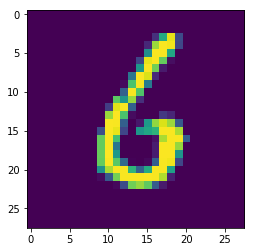

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def showImage(buffer):
    nps=np.frombuffer(buffer,dtype=np.uint8).reshape(28,28)
    fig, ax = plt.subplots()
    im = ax.imshow(nps)
    plt.show()
showImage(imgs[50])

In [86]:
def GetDataSet():
    imgs=GetImages()
    lbs=GetLabels()
    return list(zip(imgs,lbs))
    
a=GetDataSet()

7840016
2051 10000 28 28
7840000
10008
magic number: 2049 number_items: 10000


(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00T\xb9\x9f\x97<$\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xde\xfe\xfe\xfe\xfe\xf1\xc6\xc6\xc6\xc6\xc6\xc6\xc6\xc6\xaa4\x00\x00\x00\x00\x00\x00\